## Estratégia Buy and Hold simples

In [77]:
## importando bibliotecas

import yfinance as yf
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np

yf.pdr_override()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: title={'center': 'EUR/USD prices'}, xlabel='Date'>

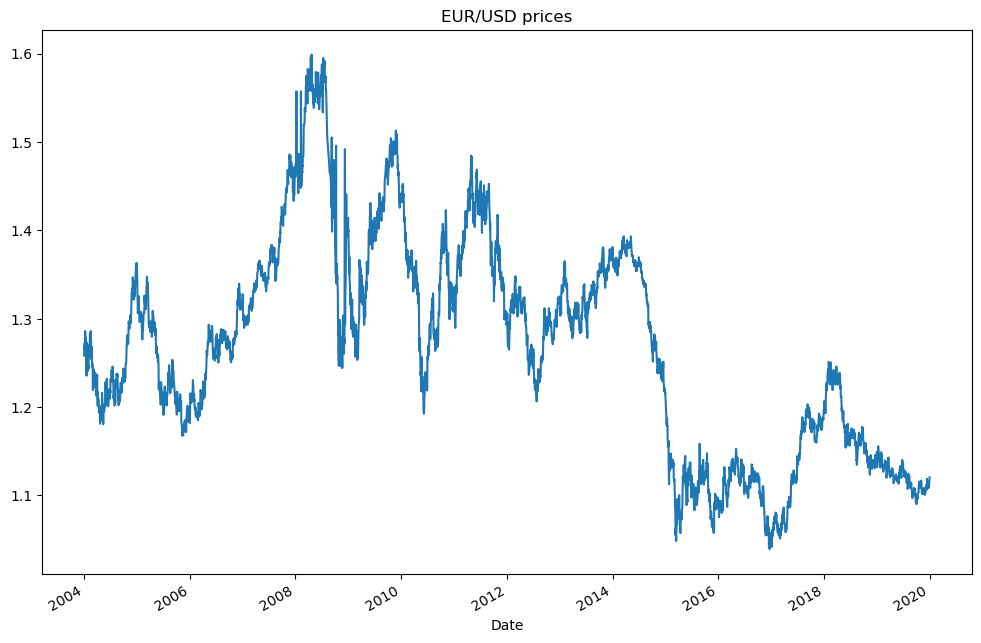

In [78]:
# importando dados do yahoo finance

ticket = 'EURUSD=X'

df = web.get_data_yahoo(ticket, start='2004-1-1', end='2020-1-1')

df['Returns'] = np.log(df['Adj Close'].div(df['Adj Close'].shift(1)))

df = df.dropna()

df['Adj Close'].plot(figsize=(12, 8), title='EUR/USD prices')

<AxesSubplot: title={'center': 'EUR/USD log returns'}, xlabel='Date'>

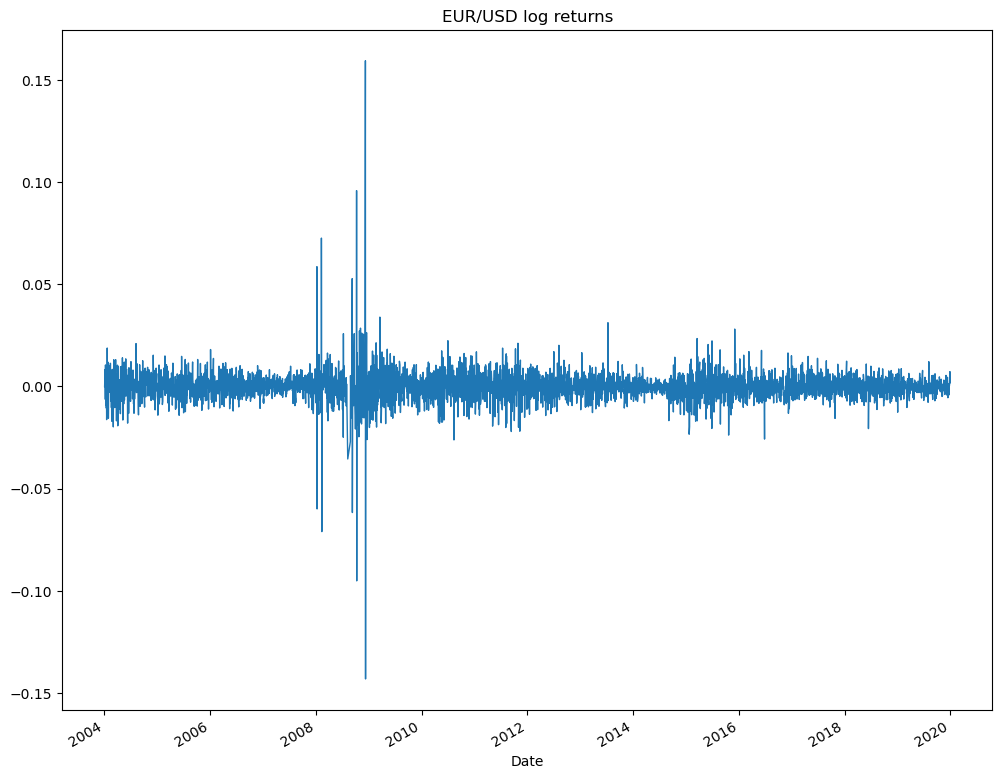

In [79]:
# Plotando gráfico dos retornos

df['Returns'].plot(figsize=(12, 10), title='EUR/USD log returns', lw=1)

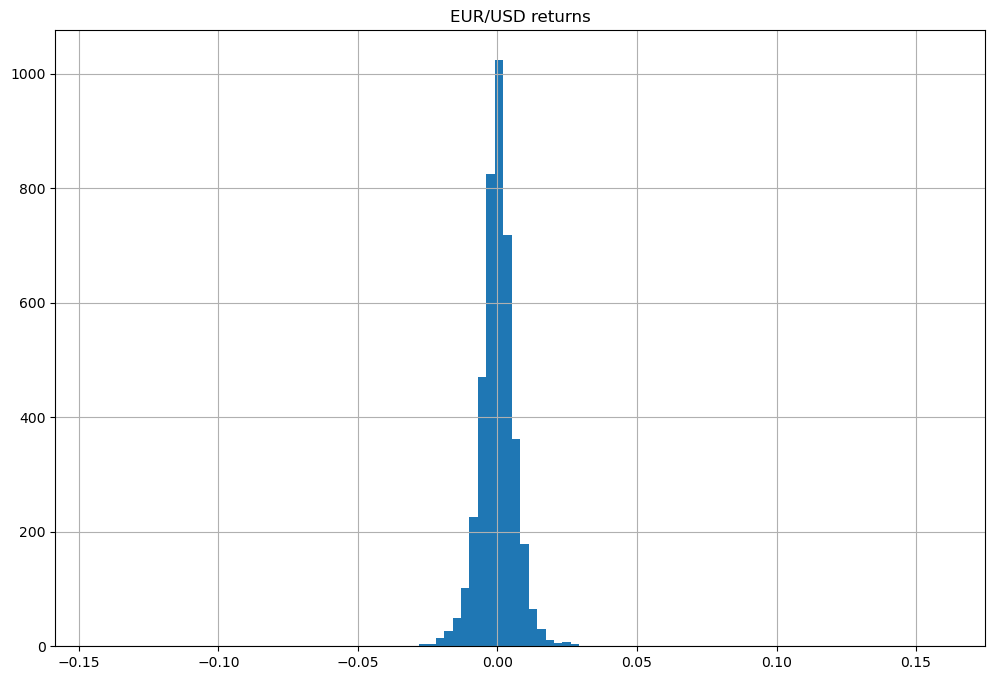

In [80]:
# Histograma dos retornos EUR/USD

df['Returns'].hist(bins=100, figsize=(12, 8))
plt.title('EUR/USD returns')
plt.show()

In [81]:
# Retorno acumulado

df['Returns'].sum()

-0.11614356299134489

In [82]:
# Retornos cumulativos simulando investimento com 1 real

df['CReturns'] = df['Returns'].cumsum().apply(np.exp)

df

,Open,High,Low,Close,Adj Close,Volume,Returns,CReturns
Date,,,,,,,,
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0,0.000000,1.000000
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0,0.008313,1.008348
2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0,0.002681,1.011055
2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0,-0.006315,1.004690
2004-01-08,1.264095,1.278707,1.256502,1.277498,1.277498,0,0.010547,1.015343
...,...,...,...,...,...,...,...,...
2019-12-25,1.109139,1.110864,1.107788,1.109016,1.109016,0,-0.000333,0.881435
2019-12-26,1.109509,1.110494,1.108279,1.109545,1.109545,0,0.000477,0.881856
2019-12-27,1.110124,1.118068,1.110000,1.110112,1.110112,0,0.000510,0.882306


<AxesSubplot: title={'center': 'EUR/USD buy and hold'}, xlabel='Date'>

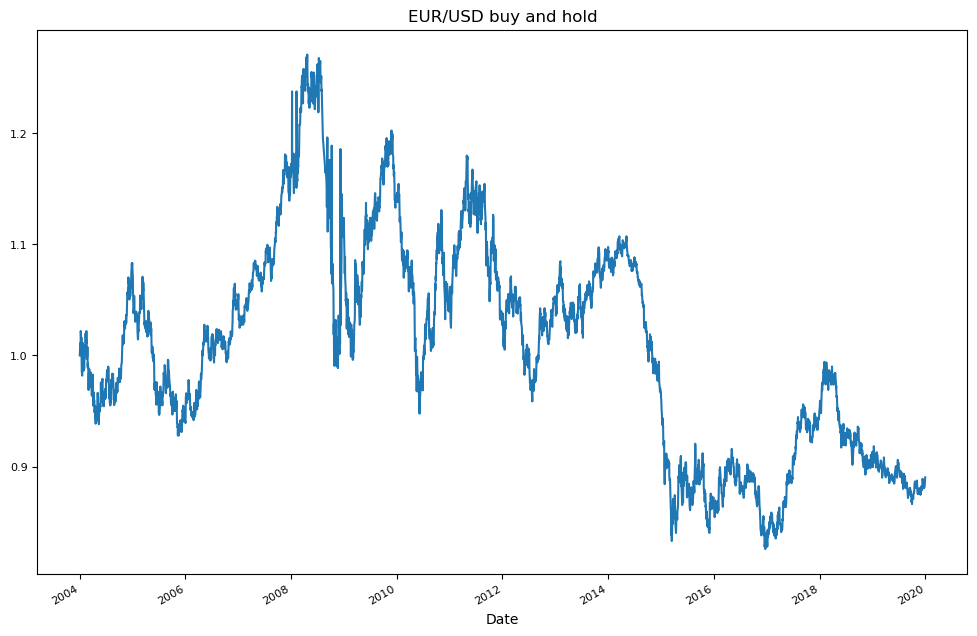

In [83]:
df['CReturns'].plot(figsize=(12, 8), title='EUR/USD buy and hold', fontsize=8)

### Métricas de desempenho

In [84]:
## retorno absoluto

df['CReturns'].iloc[-1]

0.8903473931867537

In [85]:
## percentual do retorno absoluto

df['Returns'].sum() * 100

-11.614356299134489

In [86]:
df[['Adj Close', 'Returns', 'CReturns']].describe()

,Adj Close,Returns,CReturns
count,4144.000000,4144.000000,4144.000000
mean,1.267351,-0.000028,1.007278
std,0.120719,0.007654,0.095947
min,1.039047,-0.143324,0.825824
25%,1.165467,-0.003377,0.926302
50%,1.273975,0.000000,1.012542
75%,1.351913,0.003368,1.074487
max,1.598798,0.159632,1.270709


#### Retorno anualizado e risco

In [87]:
## retorno médio anualizado

df['Returns'].mean() * 252

-0.007062784235960162

In [88]:
## risco

df['Returns'].std() * np.sqrt(252) * 100

12.150352773785778

### Drawdown máximo

In [89]:
df

,Open,High,Low,Close,Adj Close,Volume,Returns,CReturns
Date,,,,,,,,
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0,0.000000,1.000000
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0,0.008313,1.008348
2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0,0.002681,1.011055
2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0,-0.006315,1.004690
2004-01-08,1.264095,1.278707,1.256502,1.277498,1.277498,0,0.010547,1.015343
...,...,...,...,...,...,...,...,...
2019-12-25,1.109139,1.110864,1.107788,1.109016,1.109016,0,-0.000333,0.881435
2019-12-26,1.109509,1.110494,1.108279,1.109545,1.109545,0,0.000477,0.881856
2019-12-27,1.110124,1.118068,1.110000,1.110112,1.110112,0,0.000510,0.882306


In [90]:
df['cummax'] = df['CReturns'].cummax()

In [91]:
df

,Open,High,Low,Close,Adj Close,Volume,Returns,CReturns,cummax
Date,,,,,,,,,
2004-01-02,1.258194,1.262802,1.252693,1.258194,1.258194,0,0.000000,1.000000,1.000000
2004-01-05,1.263903,1.269406,1.263695,1.268698,1.268698,0,0.008313,1.008348,1.008348
2004-01-06,1.268907,1.280803,1.267202,1.272103,1.272103,0,0.002681,1.011055,1.011055
2004-01-07,1.272394,1.273999,1.262499,1.264095,1.264095,0,-0.006315,1.004690,1.011055
2004-01-08,1.264095,1.278707,1.256502,1.277498,1.277498,0,0.010547,1.015343,1.015343
...,...,...,...,...,...,...,...,...,...
2019-12-25,1.109139,1.110864,1.107788,1.109016,1.109016,0,-0.000333,0.881435,1.270709
2019-12-26,1.109509,1.110494,1.108279,1.109545,1.109545,0,0.000477,0.881856,1.270709
2019-12-27,1.110124,1.118068,1.110000,1.110112,1.110112,0,0.000510,0.882306,1.270709


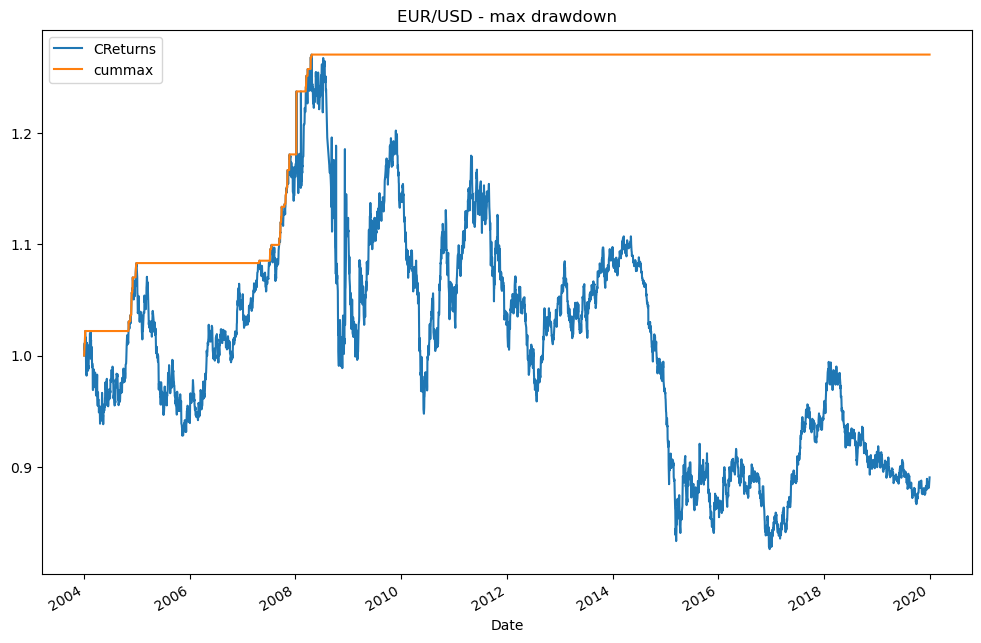

In [92]:
df[['CReturns', 'cummax']].dropna().plot(figsize=(12, 8), title='EUR/USD - max drawdown')
plt.show()

In [93]:
drawdown = df['cummax'] - df['CReturns']
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2019-12-25    0.389273
2019-12-26    0.388853
2019-12-27    0.388403
2019-12-30    0.381950
2019-12-31    0.380361
Length: 4144, dtype: float64

In [94]:
drawdown.max()

0.4448840569933433

In [95]:
drawdown.idxmax()

Timestamp('2016-12-21 00:00:00')